In [3]:
#import libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
crime = pd.read_csv('crime_data.csv')
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
def norm_func(i):
    x=(i - i.min())/(i.max()-i.min())
    return x

In [8]:
df_norm = norm_func(crime.iloc[:,1:])

In [9]:
df_norm.iloc[:,:]

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


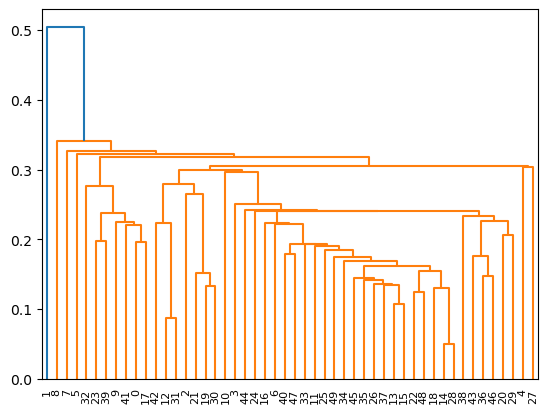

In [12]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

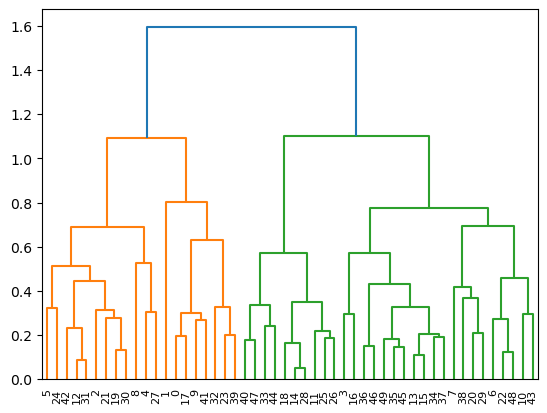

In [13]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [16]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [18]:
hc.fit_predict(df_norm)

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [19]:
y_hc= hc.fit_predict(df_norm)

In [20]:
crime['clustered']= y_hc

In [21]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustered
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [28]:
crime.groupby(["clustered"])["Unnamed: 0"].apply(lambda x: tuple(x))

clustered
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: Unnamed: 0, dtype: object

In [29]:
crime[crime['Unnamed: 0'].isin(["Delaware","Florida","Alaska","Coloroda"])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clustered
1,Alaska,10.0,263,48,44.5,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2


# K means

In [30]:
crime1 = pd.read_csv('crime_data.csv')

In [31]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
df_norm=norm_func(crime1.iloc[:,1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [33]:
from sklearn.cluster import KMeans

In [38]:
mode1_kmeans = KMeans(n_clusters=3)
mode1_kmeans.fit(df_norm)

KMeans(n_clusters=3)

In [39]:
mode1_kmeans.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int32)

In [40]:
bb=pd.Series(mode1_kmeans.labels_)

In [41]:
crime1['Labels']=pd.Series(mode1_kmeans.labels_)
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0


In [42]:
crime1.groupby(['Labels'])["Unnamed: 0"].apply(lambda x:tuple(x))

Labels
0    (Alabama, Alaska, Arizona, California, Colorad...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Kentucky, Maine, Minnesota, Mont...
Name: Unnamed: 0, dtype: object

In [44]:
crime1[crime1['Unnamed: 0'].isin(['Idaho','Iowa','kenucky','Maine','Minnesota'])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Labels
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2


# DB scan

In [45]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

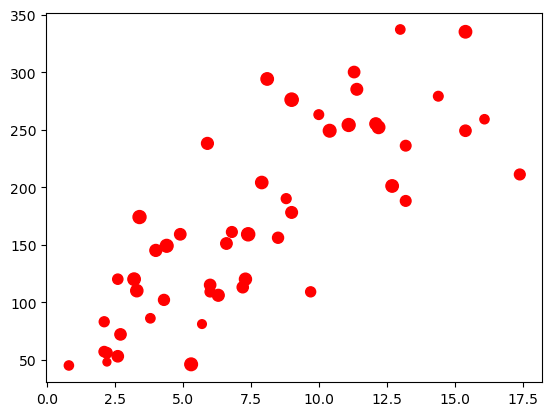

In [46]:
ds = DBSCAN(min_samples=3,eps=0.3)
class_pr=ds.fit_predict(crime1.iloc[:,1:5])
plt.scatter(crime1["Murder"], crime1["Assault"],crime1['UrbanPop'],c=class_pr,cmap=plt.cm.rainbow_r)

# Find the Optimal Number of Clusters

In [47]:
crime2 = pd.read_csv("crime_data.csv")

In [48]:
crime2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
nc=[1,2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(crime2.iloc[:,[1,2,3,4]])
    iner.append(km.inertia_)

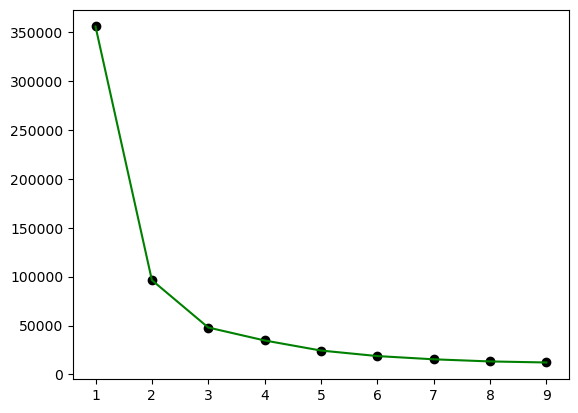

In [50]:
plt.plot(nc,iner,color='green')
plt.scatter(nc,iner,color='black')
plt.show()

# Silhouette Score

In [51]:
from sklearn.metrics import silhouette_score as sil


In [52]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')
    
    y=hc.fit_predict(crime.iloc[:,[1,2,3]])
    sc_score.append(sil(crime.iloc[:,[1,2,3]],y))

In [53]:
sc_score

[0.5840220941879746,
 0.5468981973136827,
 0.5178812715768804,
 0.49202874252476375,
 0.4747374702814869,
 0.466443618332478,
 0.43788400513390807,
 0.4690281582926271]

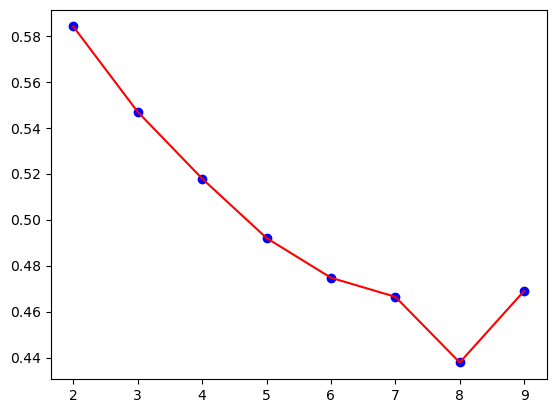

In [54]:
plt.plot(nc,sc_score,color='red')
plt.scatter(nc,sc_score,color='blue')
plt.show()